## Word Cloud 
A wordcloud is a visual representation of textual data.
We use the property standard violation data from http://data.nashiville.gov
The data file contains tens of thoudsands of violation records over three year period. 
Even though the dataset contains structured data, one of the columns contains free-form text 
which describes the incident. We use Python Word Cloud library to generate a word cloud which helps depict the most frequent issues. As can be seen, grass is the most prominent issue. A few frequent words including "tall", "high", "weed" appear to imply the issues with grass - too tall, too high, or too many weed. 

## Step 1 - Install and Import Libraries

In [ ]:
!pip install wordcloud

In [ ]:
!pip install imageio

In [2]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import imageio
import matplotlib.pyplot as plt

%matplotlib inline

## Step 2 - load and Examine the Data 

In [3]:
df = pd.read_csv("Property_Standards_Violations.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66646 entries, 0 to 66645
Data columns (total 17 columns):
Request #               66646 non-null object
Date Received           66646 non-null object
Property APN            66286 non-null object
Property Address        66286 non-null object
City                    66281 non-null object
State                   66286 non-null object
ZIP                     66281 non-null float64
Property Owner          66646 non-null object
Complaint Source        66646 non-null object
Reported Problem        66393 non-null object
Status                  66646 non-null object
Council District        66250 non-null float64
Last Activity Date      66298 non-null object
Last Activity           66298 non-null object
Last Activity Result    66292 non-null object
Violations Noted        43912 non-null object
Mapped Location         66286 non-null object
dtypes: float64(2), object(15)
memory usage: 8.6+ MB


In [5]:
df.sample(10)

,Request #,Date Received,Property APN,Property Address,City,State,ZIP,Property Owner,Complaint Source,Reported Problem,Status,Council District,Last Activity Date,Last Activity,Last Activity Result,Violations Noted,Mapped Location
39832,19-1205996,06/25/2019,04305027100,828 BROOKS AVE,MADISON,TN,37115.0,"NEELEY, ROBERT D.",INSPECTOR REPORTED,"IMV'S, POG",DONE,9.0,07/25/2019,Violation Inspection - PS,Violation Resolved,"EXTERIOR PROP AREA � VEH � INOP/UNLC,PARKING O...","828 BROOKS AVE\nMADISON, TN 37115\n(36.272441,..."
52749,18-1173343,01/04/2018,10900019600,100 TRAILS CIR,NASHVILLE,TN,37214.0,"WE TRAILS, LLC",OTHER SOURCE,Grading needed in front of Building 8 for safety,DONE,14.0,01/03/2018,Violation Inspection - PS,Violation Resolved,EXTERIOR PROP AREA � GRADING REQUIRED,"100 TRAILS CIR\nNASHVILLE, TN 37214\n(36.14784..."
52813,18-1183954,06/22/2018,04405022800,112 RAYON DR,OLD HICKORY,TN,37138.0,"BZ CAPITAL GROUP, LLC",Codes Online,High grass/weeds,DONE,11.0,10/01/2018,Violation Inspection - PS,Violation Resolved,HIGH WEEDS,"112 RAYON DR\nOLD HICKORY, TN 37138\n(36.26926..."
27951,17-1164568,08/09/2017,14814002400,3944 E RIDGE DR,NASHVILLE,TN,37211.0,"RAINES, MINDY W.",PHONE,mattress and junk in front of house,DONE,30.0,08/10/2017,Initial Violation Inspection - PS,No Cause for Action,NaN,"3944 E RIDGE DR\nNASHVILLE, TN 37211\n(36.0641..."
61351,18-1175008,02/08/2018,050100A02400CO,5303 CHESAPEAKE DR,NASHVILLE,TN,37207.0,"HENDERSON, PAMELA S.",INSPECTOR REPORTED,"premise id, inoperable vehicle, parking on gra...",DONE,3.0,06/06/2018,Env Court 1st Setting - PS,PS - Dismissal with Fine & Just Cost,"EXTERIOR OF BUILDINGS � PREMISES ID RES,EXTERI...","5303 CHESAPEAKE DR\nNASHVILLE, TN 37207"
50904,17-1171423,11/27/2017,11907013700,4 PEACHTREE ST,NASHVILLE,TN,37210.0,"PAKEERAH, FRANK ASHRAM",INSPECTOR REPORTED,"POG, JTD",DONE,16.0,12/07/2017,Violation Inspection - PS,Violation Resolved,"OPEN STORAGE, JUNK, TRASH, DEBRIS,PARKING ON G...","4 PEACHTREE ST\nNASHVILLE, TN 37210\n(36.11871..."
6493,19-1215489,11/25/2019,150090B02400CO,609 FOREST POINTE PL,ANTIOCH,TN,37013.0,"YAMASA CO., LTD",HUB,Type: Property Violations - Residential Compla...,DONE,29.0,12/16/2019,Violation Inspection - PS,Violation Resolved,OVERCROWDING � UNRELATED ADULTS,"609 FOREST POINTE PL\nANTIOCH, TN 37013\n(36.0..."
54275,18-1180400,05/09/2018,12400006700,3430 HOBSON PIKE,HERMITAGE,TN,37076.0,"BISHOP, DARREN",PHONE,"commercial vehicles at property, running a gar...",DONE,33.0,05/09/2018,Initial Violation Inspection - PS,Withdrawn,NaN,"3430 HOBSON PIKE\nHERMITAGE, TN 37076\n(36.110..."
54018,18-1177260,03/23/2018,10100016200,6675 RIVER ROAD PIKE,NASHVILLE,TN,37209.0,"GREER, RONNIE D.",Codes Online,"Junk trash and debris, Inoperable vehicles.",DONE,35.0,03/26/2018,Initial Violation Inspection - PS,No Cause for Action,NaN,"6675 RIVER ROAD PIKE\nNASHVILLE, TN 37209\n(36..."
26576,17-1157687,05/17/2017,08301024700,1043 PETWAY AVE,NASHVILLE,TN,37206.0,"SWEATT, DONOVIAS T. ET UX",EMAIL,Trailer full of junk in yard,DONE,5.0,07/24/2017,Violation Inspection - PS,Violation Resolved,"EXTERIOR PROP AREA � OPEN STORAGE - ALL,PARKIN...","1043 PETWAY AVE\nNASHVILLE, TN 37206\n(36.1867..."


In [48]:
df["Reported Problem"].sample(20)

47254                                     High grass/weeds
52675                                junk trash and debris
53915    Caller states the resident is running a busine...
13604    Type: Property Violations - Residential Compla...
3461     Type: Property Violations - Tall Grass and Wee...
59939                                            grass/j/d
61959                                 Junk, trash & debris
43172                                            JTD @ ROW
12876                                                  NVF
38259                                junk trash and debris
61964                   debris located in back of building
2948                                    not owner occupied
49297    Type: Property Violations - Junk and Debris\n\...
17492    Junk, trash & debris; trash bend in the yard f...
52993    high grass and weeds, bushes growing over guar...
31143    Type: Property Violations - Cars Parked On Law...
58940                                Junk trash and debr

## Step 3 - Generate the Word Cloud

In [72]:
# We add the additional stop words to the standard list as we explore the visualization iteratively 
# and determine which words might need to be excluded. These words do not provide much information
# about the reported issues.

mask_house = imageio.imread("./house-shape.GIF")

exclude = ["al", "name", "ndescription","violations", "property","reported", "problem", "type", "dtype"]
stopwords_new = STOPWORDS.update(exclude)    # STOPWORDS is a of tyep Set     
#stopwords_new = exclude + list(STOPWORDS)   # this works too

text = df["Reported Problem"]

wc = WordCloud(
  # width = 1200,
  # height = 500,
  # max_words=50,
  # scale = 15,
  # max_font_size=20,
    background_color = 'white',
    mask = mask_house,
    colormap="Reds",
    stopwords = stopwords_new,
)

wc.generate(str(text))

## Step 4 - Plot the Word Cloud using Matplotlib

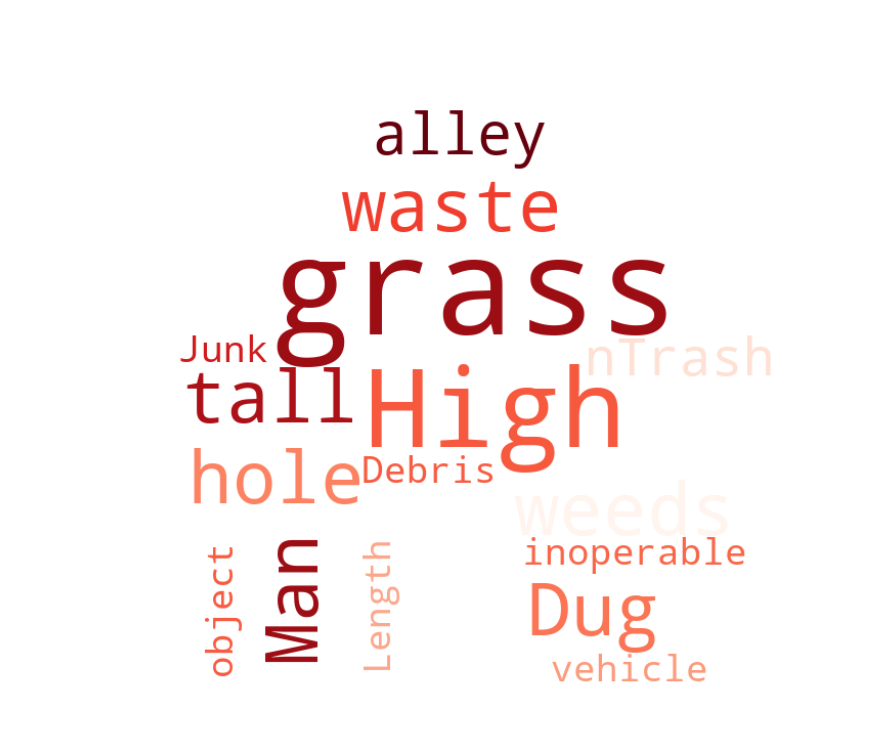

In [75]:
fig = plt.figure(
    figsize = (20,10)
#   facecolor = 'k',
#   edgecolor = 'k'
)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Step 5 - Save the Word Cloud to a File

In [74]:
wc.to_file('word-cloud.png')